<a href="https://colab.research.google.com/github/GUmarEla/Imgae-processing-algorithms/blob/main/I_P__ColorSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COLOR IMAGE PROCESSING

this Part contain color convertion from:

*   **BGR** to **Grayscale** use function
    (*cvt_clr_BGR2Gray(image)*)
*   **BGR** to **HLS** use function
    (*cvt_clr_BGR2HLS(image)*)
*   **BGR** to **HSV** use function
    (*cvt_clr_BGR2HSV(image)*)


### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Load image with URL

In [ ]:
# Import necessary libraries
import requests

# Define the image URL
url = "https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcR4GlTzKuqP4x3QH5iMv4A5NLBjF3h9JPFNJ2yUjPj6n2nJsPj9"

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the image
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
# plt.imshow(image)
# plt.axis('off')  # Turn off axis labels
# plt.show()


### BGR to Gray
The RGB image conversion to grayscale

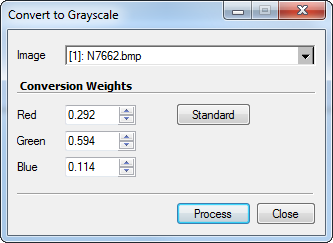

image from: *https://www.mirametrics.com/help/mira_al_8/source/convert_to_grayscale.htm*

the numbers(weighta) in the image are just an example.

we worked with the weights:
0.155 for red channel
0.587 for green channel
0.299 for blue chnnel

the sum of the weights should be 1, if not we will have problems of overflow, and brigthness increase causing loss of details

In [ ]:
def cvt_clr_BGR2Gray(image):
  new_img = np.zeros(image.shape[0:2], dtype=np.uint8)

  new_img = .299*image[:,:,2] + .587*image[:,:,1] + .114*image[:,:,0]

  return new_img

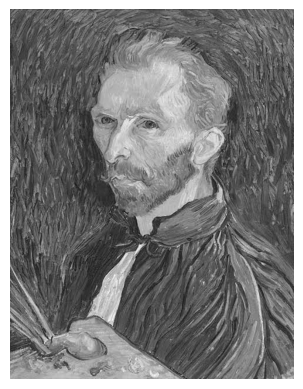

In [ ]:
# try the code on this example
plt.imshow(cvt_clr_BGR2Gray(image), cmap="gray")
plt.axis('off')
plt.show()

### RGB to HSL
Color convertion from BGR to HSL

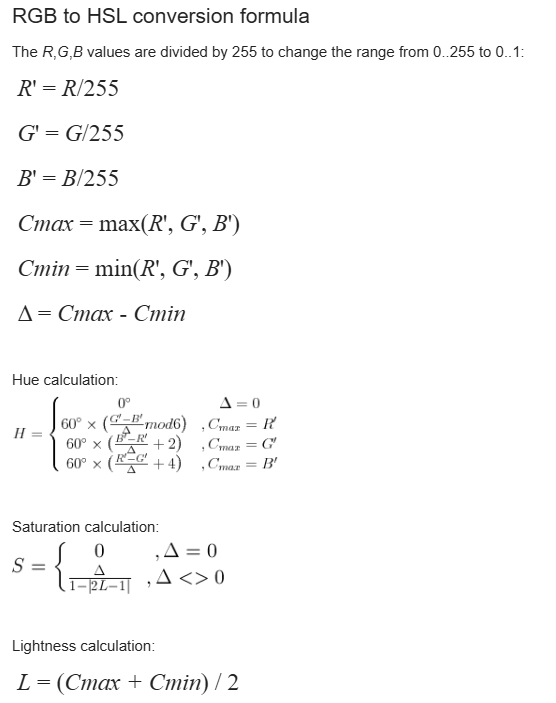

image from: *https://www.rapidtables.com/*

Second way to code the Hue

R,G,B: Original red, green, blue values (0-255).
R′,G′,B′: Normalized red, green, blue values (0-1).
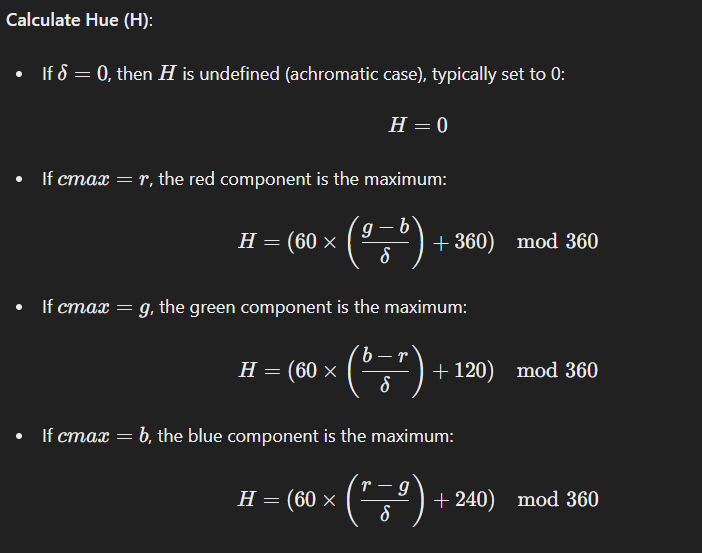

In [ ]:
def cvt_clr_BGR2HLS(image):
  img_new = np.zeros(image.shape, np.uint8)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      b, g, r = image[i, j, :] / 255.0

      cmax = max(r, g, b)
      cmin = min(r, g, b)
      delta = cmax - cmin

      # Hue calculation
      if delta == 0:
          h = 0
      elif cmax == r:
          h = (60 * ((g - b) / delta) + 360) % 360
      elif cmax == g:
          h = (60 * ((b - r) / delta) + 120) % 360
      elif cmax == b:
          h = (60 * ((r - g) / delta) + 240) % 360

      # Lightness calculation
      l1 = (cmax + cmin) / 2

      # Saturation calculation
      if delta == 0:
          s = 0
      else:
          s = delta / (1 - abs(2 * l1 - 1))

      # Scale hue to 0-179, lightness and saturation to 0-255
      h = int(h / 2)  # 0-179
      l1 = int(l1 * 255)
      s = int(s * 255)

      img_new[i, j, :] = [h, l1, s]
  # plt.imshow(img_new)
  # plt.axis('off')
  # plt.show()
  return img_new

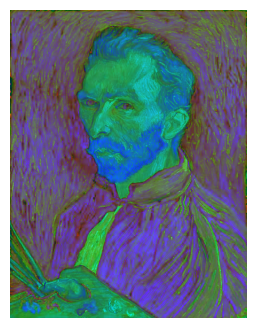

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cvt_clr_BGR2HLS(image))
plt.axis('off')
plt.show()

Compare to cv2 converting from BGR TO HLS


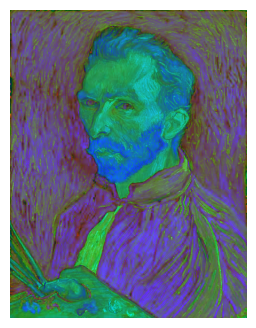

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HLS))
plt.axis('off')
plt.show()

### RGB to HSV
Color convertion from BGR to HSV
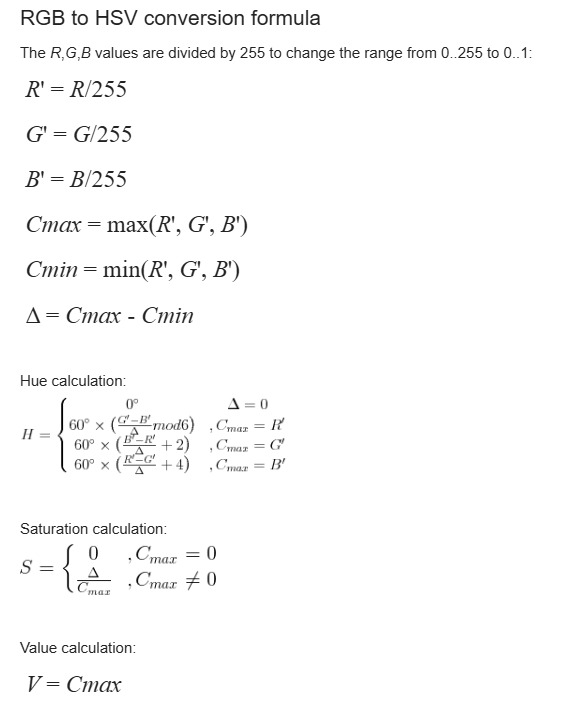

image from: *https://www.rapidtables.com/*

In [ ]:
def cvt_clr_BGR2HSV(image):
  img_new = np.zeros(image.shape, np.uint8)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      b, g, r = image[i, j, :] / 255.0

      cmax = max(r, g, b)
      cmin = min(r, g, b)
      delta = cmax - cmin

      # Hue calculation
      if delta == 0:
          h = 0
      elif cmax == r:
          h = (60 * ((g - b) / delta) + 360) % 360
      elif cmax == g:
          h = (60 * ((b - r) / delta) + 120) % 360
      elif cmax == b:
          h = (60 * ((r - g) / delta) + 240) % 360

      # Saturation calculation
      if delta == 0:
          s = 0
      else:
          s = delta / cmax

      # v calculation
      v = cmax

      # Scale hue to 0-179, lightness and saturation to 0-255
      h = int(h / 2)  # 0-179
      s = int(s * 255)
      v = int(v * 255)

      img_new[i, j, :] = [h, s, v]
  # plt.imshow(img_new)
  # plt.show()
  return img_new

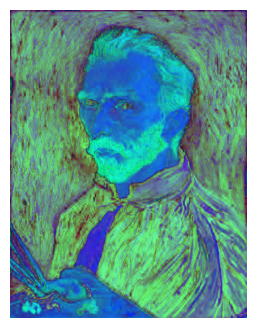

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cvt_clr_BGR2HSV(image))
plt.axis('off')
plt.show()

Compare to cv2 converting from BGR TO HSV

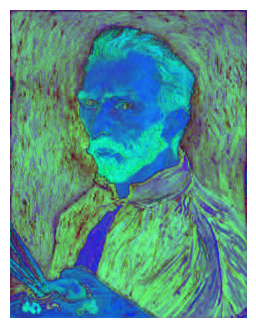

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
plt.axis('off')
plt.show()